In [1]:
# !unzip 'Ham-Spam.zip'

In [2]:
# pip install pandas

In [3]:
# pip install sklearn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Import the Required data

In [2]:
df = pd.read_csv('spam.csv', encoding='latin-1')  
#latin-1 if symbols like euros, dollars, hash different looking wordings used
#utf-8 if it doesn't have such latin letters, symbols and cannot import data directly

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df.columns = ['SpamHam', 'SMS']

In [8]:
# pip install seaborn

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


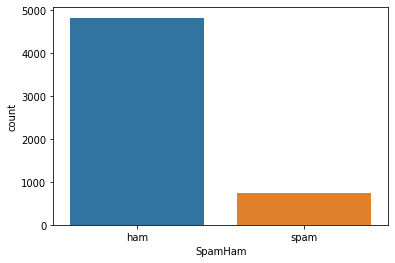

In [9]:
import seaborn as sns

sns.countplot(df['SpamHam'])
plt.show()

In [10]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import stopwords
import re

nltk.download('stopwords')
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 
nltk.download('wordnet')  #Pre-trained Dataset like imagenet

def preprocess(sentence):
    sentence = str(sentence)     #Convert sentence to into string
    sentence = sentence.lower()  #Lowercase
    sentence = sentence.replace('{html}',"")  #Replace html to blank
    cleanr = re.compile('<.*?>')   #Special characters
    cleantext = re.sub(cleanr, '', sentence)   #Remove the special characters
    rem_url = re.sub(r'http\S+', '',cleantext) #Remove all the website links
    rem_num = re.sub('[0-9]+', '', rem_url)  #Remove all the numbers
    tokenizer = RegexpTokenizer(r'\w+')  #Match all the alphanumeric
    tokens = tokenizer.tokenize(rem_num) #Tokenize words
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]  #Words that are not in stop words & occured more than 2 times
    stem_words = [stemmer.stem(w) for w in filtered_words]  #Stemming
    lemma_words = [lemmatizer.lemmatize(w) for w in stem_words]  #Lemmatize
    return " ".join(lemma_words)  #Join the filtered tokens

[nltk_data] Downloading package stopwords to /home/studio-lab-
[nltk_data]     user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/studio-lab-
[nltk_data]     user/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [11]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /home/studio-lab-
[nltk_data]     user/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [12]:
X = df['SMS'].map(lambda s: preprocess(s))
X

0       jurong point crazi avail bugi great world buff...
1                                        lar joke wif oni
2       free entri wkli comp win cup final tkt may tex...
3                           dun say earli hor alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    time tri contact pound prize claim easi call p...
5568                                     go esplanad home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth el next...
5571                                       rofl true name
Name: SMS, Length: 5572, dtype: object

In [13]:
vect = TfidfVectorizer()

In [14]:
X.shape  #Number of rows/documents

(5572,)

In [15]:
X = vect.fit_transform(X)

In [16]:
X.shape  #Number of documents, Number of cols/tokens

(5572, 6083)

In [17]:
X

<5572x6083 sparse matrix of type '<class 'numpy.float64'>'
	with 41349 stored elements in Compressed Sparse Row format>

In [18]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
Y = le.fit_transform(df['SpamHam'])

In [19]:
Y.shape

(5572,)

## Without SMOTE

In [20]:
X = X.toarray()
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1234)

In [21]:
print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(4736, 6083)
(836, 6083)
(4736,)
(836,)


### Implement NB Classifier

In [22]:
nb = GaussianNB()
nb.fit(X_train, y_train)
pred_nb = nb.predict(X_test)

In [23]:
cm_nb = confusion_matrix(y_test, pred_nb)
acc_nb = accuracy_score(y_test, pred_nb)
classrep_nb = classification_report(y_test, pred_nb)

In [24]:
print(cm_nb)
print()

print(acc_nb)
print()

print(classrep_nb)
print()

[[610  98]
 [ 15 113]]

0.8648325358851675

              precision    recall  f1-score   support

           0       0.98      0.86      0.92       708
           1       0.54      0.88      0.67       128

    accuracy                           0.86       836
   macro avg       0.76      0.87      0.79       836
weighted avg       0.91      0.86      0.88       836




## SMOTE

In [25]:
# A problem with imbalanced classification is that there are too few examples of the minority class for a model to effectively learn the decision boundary.

# One way to solve this problem is to oversample the examples in the minority class. 
# This can be achieved by simply duplicating examples from the minority class in the training dataset prior to fitting a model. 
# This can balance the class distribution but does not provide any additional information to the model.

# An improvement on duplicating examples from the minority class is to synthesize new examples from the minority class. 
# This is a type of data augmentation for tabular data and can be very effective.

In [26]:
# pip install imblearn

In [27]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1234)

In [29]:
print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(8202, 6083)
(1448, 6083)
(8202,)
(1448,)


### Implement NB Classifier

In [30]:
nb = GaussianNB()
nb.fit(X_train, y_train)
pred_nb = nb.predict(X_test)

In [31]:
cm_nb = confusion_matrix(y_test, pred_nb)
acc_nb = accuracy_score(y_test, pred_nb)
classrep_nb = classification_report(y_test, pred_nb)

In [32]:
print(cm_nb)
print()

print(acc_nb)
print()

print(classrep_nb)
print()

[[616 117]
 [  0 715]]

0.9191988950276243

              precision    recall  f1-score   support

           0       1.00      0.84      0.91       733
           1       0.86      1.00      0.92       715

    accuracy                           0.92      1448
   macro avg       0.93      0.92      0.92      1448
weighted avg       0.93      0.92      0.92      1448




### Implement SVM Classifier

In [33]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

In [34]:
cm_svc = confusion_matrix(y_test, pred_svc)
acc_svc = accuracy_score(y_test, pred_svc)
classrep_svc = classification_report(y_test, pred_svc)

In [35]:
print(cm_svc)
print()

print(acc_svc)
print()

print(classrep_svc)
print()

[[732   1]
 [  2 713]]

0.9979281767955801

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       733
           1       1.00      1.00      1.00       715

    accuracy                           1.00      1448
   macro avg       1.00      1.00      1.00      1448
weighted avg       1.00      1.00      1.00      1448




In [36]:
from sklearn.svm import SVC
svc = SVC(C=2)
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

In [37]:
cm_svc = confusion_matrix(y_test, pred_svc)
acc_svc = accuracy_score(y_test, pred_svc)
classrep_svc = classification_report(y_test, pred_svc)

In [38]:
print(cm_svc)
print()

print(acc_svc)
print()

print(classrep_svc)
print()

[[732   1]
 [  2 713]]

0.9979281767955801

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       733
           1       1.00      1.00      1.00       715

    accuracy                           1.00      1448
   macro avg       1.00      1.00      1.00      1448
weighted avg       1.00      1.00      1.00      1448




In [39]:
sent = 'I will meet my friends for dinner'

In [40]:
sent = preprocess(sent)